In [1]:
import numpy as np
import pandas as pd


In [2]:
# Set seed for reproducibility
np.random.seed(42)

In [3]:
# Parameters
num_samples = 1000
shapes = ['circle', 'square', 'triangle']
colors = ['red', 'green', 'blue']
textures = ['smooth', 'rough']

In [5]:
# Create DataFrame
df = pd.DataFrame(data)

In [6]:
# Save to CSV
df.to_csv('inferotemporal_simulated_data.csv', index=False)

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# Load the dataset
df = pd.read_csv('inferotemporal_data.csv')

In [10]:
# Basic statistics
print(df.describe())

       V1_response  V2_response  V4_response  IT_activity
count  1000.000000  1000.000000  1000.000000  1000.000000
mean      0.506760     0.511140     0.483158     0.488261
std       0.291389     0.284743     0.292610     0.285807
min       0.000188     0.000443     0.000187     0.002077
25%       0.246266     0.271484     0.231751     0.240076
50%       0.526752     0.518650     0.470433     0.487298
75%       0.756569     0.757665     0.742727     0.730912
max       0.999714     0.999544     0.997623     0.999049


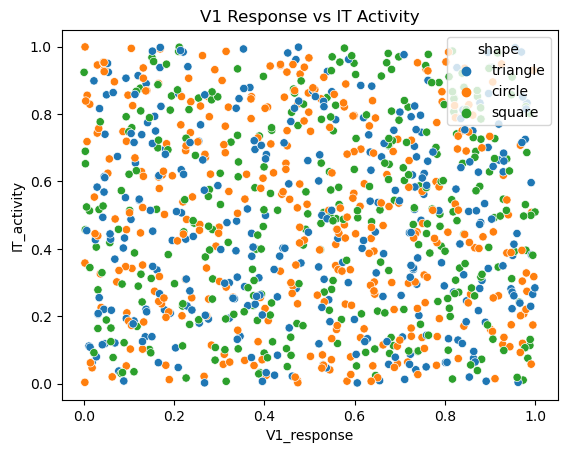

In [11]:
# Visualization example: Scatter plot of V1 response vs IT activity
sns.scatterplot(data=df, x='V1_response', y='IT_activity', hue='shape')
plt.title('V1 Response vs IT Activity')
plt.show()

In [12]:
df = pd.get_dummies(df, columns=['shape', 'color', 'texture'])

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [14]:
# Split data into features and target variable
X = df.drop(columns=['IT_activity'])
y = df['IT_activity']

In [15]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Modeling example: Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Predicting and evaluating the model
predictions = model.predict(X_test)

In [19]:
from sklearn.metrics import mean_squared_error

# Assuming y_test are the true values and predictions are your model's predictions
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.08292626677463737


In [20]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

R-squared: -0.016528352459616924


In [24]:
from sklearn.model_selection import KFold, cross_val_score

# Example using K-Fold cross-validation for a regression model
kf = KFold(n_splits=10, shuffle=True, random_state=42)
model = LinearRegression() # Replace with your model

# Perform cross-validation
mse_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kf)
print(f'Mean Squared Error (CV): {-mse_scores.mean()}')

Mean Squared Error (CV): 0.08207689223237502


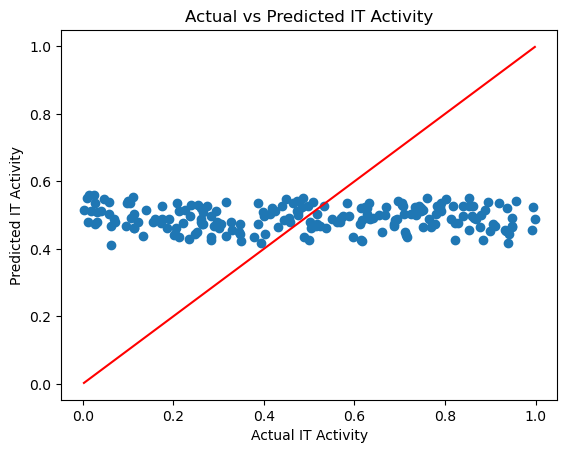

In [28]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual IT Activity')
plt.ylabel('Predicted IT Activity')
plt.title('Actual vs Predicted IT Activity')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Diagonal line
plt.show()